# **GRIPS @ THE SPARKS FOUNDATION**
# ***Computer Vision & Internet of Things***
# **TASK- 2**
#***Color detection in Image using Opencv***
# **GIRISHWAR .S**

STEP 1 : importing the required libraries 

In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import cv2
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

STEP 2: reading image in RGB color space

In [21]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

STEP 3: importing image and resizeing

In [22]:
image = get_image('/content/picture.jpg')
number_of_colors = 10
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)

In [23]:
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]

STEP 5: detecting color when n=10

([<matplotlib.patches.Wedge at 0x7f374d492250>,
 [Text(1.0486531279118965, 0.332154508204534, '#454f51'),
  Text(0.6760469621134231, 0.8677329687278295, '#cec19e'),
  Text(-0.0635985431793238, 1.0981599270167657, '#946a48'),
  Text(-0.7823124450100312, 0.7732963457707706, '#eadcb0'),
  Text(-1.0955277547740447, 0.09909055716737354, '#828483'),
  Text(-0.9490834659838367, -0.5560940339511902, '#b78960'),
  Text(-0.5490088449474515, -0.9531995007182208, '#342926'),
  Text(-0.0020435923917381505, -1.0999981016938787, '#6d4b2f'),
  Text(0.6319366808382746, -0.900364388129109, '#b4a78c'),
  Text(1.0529069673034546, -0.31841312504958386, '#5f6968')])

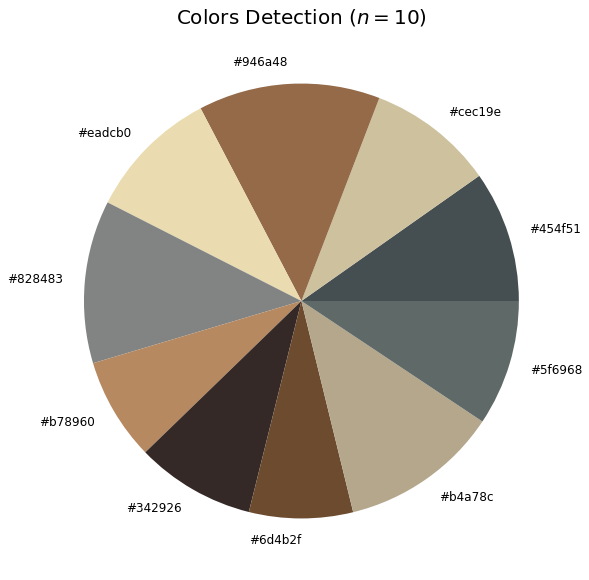

In [24]:
plt.title('Colors Detection ($n=10$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)


In [25]:
def inthreshold(array):
    count = 0
    for i in range(len(array)):
        if array[i]>=-12 and array[i]<=12:
            count=count+1
    return count

def show_color(col_index):
    color = col_index
    sub_image = (image-rgb_colors[color])
    ZEROS_VALUES = []
    COUNT = []
    for i in range(len(sub_image)):
        for j in range(len(sub_image[i])):
            e = sub_image[i,j]
            #print(e.shape)
            count = inthreshold(e)
            COUNT.append(count)
            if count==2:
                ZEROS_VALUES.append([i,j])
    color_arr=(np.zeros((16,16,3))+rgb_colors[color]).astype(int)
    normalized = sub_image - sub_image.min()
    normalized = ((sub_image/sub_image.max())*255).astype(int)
    ZEROS_IMAGE = img_2.copy()
    for i in range(len(ZEROS_VALUES)):
        ZEROS_IMAGE[ZEROS_VALUES[i][0],ZEROS_VALUES[i][1],:] = [250,250,250]
    plt.subplot(1,3,1)
    plt.imshow(ZEROS_IMAGE.astype(int))
    plt.subplot(1,3,2)
    plt.imshow(image)
    plt.subplot(1,3,3)
    #pwargs = {'interpolation':'nearest'}
    plt.imshow(color_arr)

In [26]:
def show_color(col_index):
    color = col_index
    sub_image = (image-rgb_colors[color])
    ZEROS_VALUES = []
    COUNT = []
    for i in range(len(sub_image)):
        for j in range(len(sub_image[i])):
            e = sub_image[i,j]
            #print(e.shape)
            count = inthreshold(e)
            COUNT.append(count)
            if count==2:
                ZEROS_VALUES.append([i,j])
    color_arr=(np.zeros((16,16,3))+rgb_colors[color]).astype(int)
    normalized = sub_image - sub_image.min()
    normalized = ((sub_image/sub_image.max())*255).astype(int)
    ZEROS_IMAGE = image.copy()
    for i in range(len(ZEROS_VALUES)):
        ZEROS_IMAGE[ZEROS_VALUES[i][0],ZEROS_VALUES[i][1],:] = [250,250,250]
    plt.subplot(1,3,1)
    plt.imshow(ZEROS_IMAGE.astype(int))
    plt.subplot(1,3,2)
    plt.imshow(image)
    plt.subplot(1,3,3)
    #pwargs = {'interpolation':'nearest'}
    plt.imshow(color_arr)

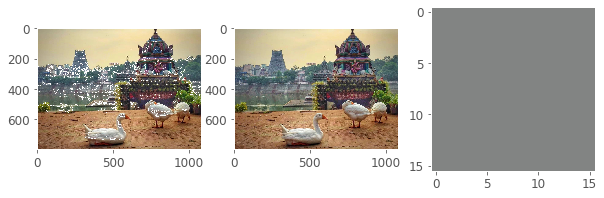

In [27]:
show_color(4)

STEP 6: image processing

In [28]:
for i in range(len(rgb_colors)):
    rgb_colors[i] = rgb_colors[i].astype(int)

In [29]:
def square_maker():
    inp_img = image
    h = int(inp_img.shape[0])
    step_h = int(h/10) 
    w = int(inp_img.shape[1])
    step_w = int(w/10) 
    X = np.arange(0,h+step_h,step_h)
    Y =np.arange(0,w+step_w,step_w)
    squares = [inp_img[0:step_h,0:step_w]]
    for i in range(0,len(X)-1):
        for j in range(0,len(Y)-1):
            squares.append(inp_img[X[i]:X[i+1],Y[j]:Y[j+1]])
    return np.array(squares)[1::]

In [30]:
def color_computing(array):
    DIFF = []
    squared_image = square_maker()
    for square in squared_image:
        DIFF_COLOR = []
        for color in range(len(rgb_colors)):
            diff = np.abs(square - rgb_colors[color])
            DIFF_COLOR.append(diff.mean())
        DIFF.append(DIFF_COLOR)
    return np.array(DIFF)

STEP 7 : plotting the best color for each square

In [31]:
def best_color_plot(selected_slice):
    plt.subplot(1,2,1)
    plt.title('Retrieved Color')
    plt.imshow((np.zeros((16,16,3))+ rgb_colors[color_computing(image)[selected_slice].argmin()]).astype(int))
    plt.subplot(1,2,2)
    plt.title('Selected Square: '+ str(selected_slice))
    plt.imshow(square_maker()[selected_slice])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]


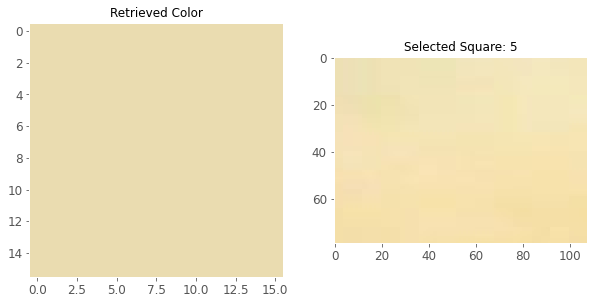

In [32]:
best_color_plot(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]


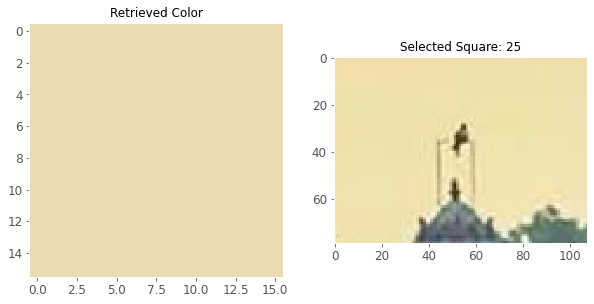

In [33]:
best_color_plot(25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]


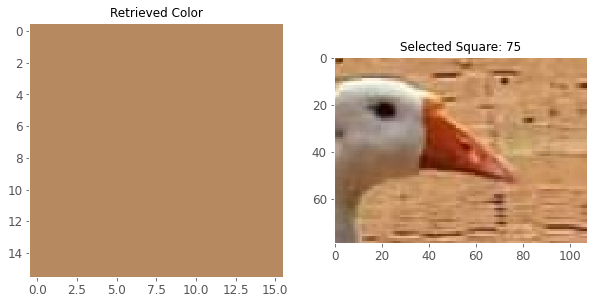

In [34]:
best_color_plot(75)

In [35]:
def build_summary():
    results = color_computing(image)
    cols = ['Square Number'] + hex_colors
    sorted_results = pd.DataFrame(columns= cols)
    k=0

    for r in results:
        d = {'Square Number':int(k)}
        for c in range(len(hex_colors)):
            d[hex_colors[c]] = r[c]*100/r.sum()
        sorted_results = sorted_results.append(d,ignore_index=True)
        k=k+1
    sorted_results['Square Number'] = sorted_results['Square Number'].astype(int)
    return sorted_results

In [36]:
summary_df = build_summary()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]


In [37]:
summary_df.head()

,Square Number,#454f51,#cec19e,#946a48,#eadcb0,#828483,#b78960,#342926,#6d4b2f,#b4a78c,#5f6968
0,0,15.536112,5.595636,9.286784,10.298738,5.023066,4.958051,21.849866,15.407260,1.340329,10.704158
1,1,16.240443,1.490021,11.035006,5.278939,7.439499,6.257551,21.499543,16.133114,2.410264,12.215621
2,2,15.931427,1.266222,11.564305,2.122344,8.547840,7.512337,20.343571,15.841383,4.315784,12.554787
3,3,15.569018,2.371237,11.666016,0.639059,8.970127,8.044673,19.512257,15.488544,5.187837,12.551233
4,4,15.341140,2.892520,11.659675,0.376334,9.116808,8.243883,19.060558,15.265233,5.549203,12.494646
